In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import random
import requests as req
from citipy import citipy as cp

In [2]:
api_key = ""
url = "http://api.openweathermap.org/data/2.5/weather?"

In [3]:
cities_list = []
country_list = []
while len(cities_list) < 1000:
    city = cp.nearest_city(random.randint(-90, 90), random.randint(-180, 180))
    name = city.city_name
    country = city.country_code
    if name not in cities_list:
        cities_list.append(name)
        country_list.append(country)

In [4]:
city_df = pd.DataFrame({"City Name": cities_list, "Country Code": country_list, "Temperature (F)": "", "Humidity (%)": "", "Cloudiness (%)": "", "Wind Speed (MPH)": "", "Latitude": "", "Longitude": ""})
city_df.head()

,City Name,Cloudiness (%),Country Code,Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (MPH)
0,faya,,td,,,,,
1,khatima,,in,,,,,
2,seoul,,kr,,,,,
3,aasiaat,,gl,,,,,
4,torbay,,ca,,,,,


In [5]:
row_count = 0

for index, row in city_df.iterrows():
    weather_url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=%s&appid=%s" % (row["City Name"], row["Country Code"], "imperial", api_key)
    weather_json = req.get(weather_url).json()
    print("Processing - City Name: " + row["City Name"] + "\n" + "City Number: #" + str(row_count) + "\n" + "City URL: " + weather_url)
    row_count += 1
    
    try:
        temp = weather_json["main"]["temp"]
        humid = weather_json["main"]["humidity"]
        speed = weather_json["wind"]["speed"]
        clouds = weather_json["clouds"]["all"]
        lat = weather_json["coord"]["lat"]
        lon = weather_json["coord"]["lon"]
        
        city_df.at[index, "Temperature (F)"] = temp
        city_df.at[index, "Humidity (%)"] = humid
        city_df.at[index, "Wind Speed (MPH)"] = speed
        city_df.at[index, "Cloudiness (%)"] = clouds
        city_df.at[index, "Latitude"] = lat
        city_df.at[index, "Longitude"] = lon
        
    except:
        print("ERROR WITH CITY DATA, SKIPPING")
        city_df.at[index, "Latitude"] = "N/A"
        continue

Processing - City Name: faya
City Number: #0
City URL: http://api.openweathermap.org/data/2.5/weather?q=faya,td&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
ERROR WITH CITY DATA, SKIPPING
Processing - City Name: khatima
City Number: #1
City URL: http://api.openweathermap.org/data/2.5/weather?q=khatima,in&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: seoul
City Number: #2
City URL: http://api.openweathermap.org/data/2.5/weather?q=seoul,kr&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: aasiaat
City Number: #3
City URL: http://api.openweathermap.org/data/2.5/weather?q=aasiaat,gl&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: torbay
City Number: #4
City URL: http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: codrington
City Number: #5
City URL: http://api.openweathermap.org/data/2.5/weather?q=codrington,

Processing - City Name: ancud
City Number: #46
City URL: http://api.openweathermap.org/data/2.5/weather?q=ancud,cl&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: cape town
City Number: #47
City URL: http://api.openweathermap.org/data/2.5/weather?q=cape town,za&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: mitsamiouli
City Number: #48
City URL: http://api.openweathermap.org/data/2.5/weather?q=mitsamiouli,km&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: okha
City Number: #49
City URL: http://api.openweathermap.org/data/2.5/weather?q=okha,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: busselton
City Number: #50
City URL: http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: samusu
City Number: #51
City URL: http://api.openweathermap.org/data/2.5/weather?q=samusu,ws&units=imperi

Processing - City Name: beringovskiy
City Number: #92
City URL: http://api.openweathermap.org/data/2.5/weather?q=beringovskiy,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: parangan
City Number: #93
City URL: http://api.openweathermap.org/data/2.5/weather?q=parangan,ph&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: teguldet
City Number: #94
City URL: http://api.openweathermap.org/data/2.5/weather?q=teguldet,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: wentzville
City Number: #95
City URL: http://api.openweathermap.org/data/2.5/weather?q=wentzville,us&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: kodiak
City Number: #96
City URL: http://api.openweathermap.org/data/2.5/weather?q=kodiak,us&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: harper
City Number: #97
City URL: http://api.openweathermap.org/data/2.5/weather?q=harper,lr&

Processing - City Name: santa cruz
City Number: #137
City URL: http://api.openweathermap.org/data/2.5/weather?q=santa cruz,cr&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: tilichiki
City Number: #138
City URL: http://api.openweathermap.org/data/2.5/weather?q=tilichiki,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: plettenberg bay
City Number: #139
City URL: http://api.openweathermap.org/data/2.5/weather?q=plettenberg bay,za&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: yeppoon
City Number: #140
City URL: http://api.openweathermap.org/data/2.5/weather?q=yeppoon,au&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: alofi
City Number: #141
City URL: http://api.openweathermap.org/data/2.5/weather?q=alofi,nu&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: preobrazheniye
City Number: #142
City URL: http://api.openweathermap.org/data/2.5/we

Processing - City Name: freeport
City Number: #183
City URL: http://api.openweathermap.org/data/2.5/weather?q=freeport,us&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: sao jose da coroa grande
City Number: #184
City URL: http://api.openweathermap.org/data/2.5/weather?q=sao jose da coroa grande,br&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: dingle
City Number: #185
City URL: http://api.openweathermap.org/data/2.5/weather?q=dingle,ie&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: woodward
City Number: #186
City URL: http://api.openweathermap.org/data/2.5/weather?q=woodward,us&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: portland
City Number: #187
City URL: http://api.openweathermap.org/data/2.5/weather?q=portland,au&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: asau
City Number: #188
City URL: http://api.openweathermap.org/data/

Processing - City Name: ilulissat
City Number: #228
City URL: http://api.openweathermap.org/data/2.5/weather?q=ilulissat,gl&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: valparaiso
City Number: #229
City URL: http://api.openweathermap.org/data/2.5/weather?q=valparaiso,cl&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: champerico
City Number: #230
City URL: http://api.openweathermap.org/data/2.5/weather?q=champerico,gt&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: naze
City Number: #231
City URL: http://api.openweathermap.org/data/2.5/weather?q=naze,jp&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: palatka
City Number: #232
City URL: http://api.openweathermap.org/data/2.5/weather?q=palatka,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: hobyo
City Number: #233
City URL: http://api.openweathermap.org/data/2.5/weather?q=hobyo,so&unit

Processing - City Name: parkes
City Number: #274
City URL: http://api.openweathermap.org/data/2.5/weather?q=parkes,au&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: ostrovnoy
City Number: #275
City URL: http://api.openweathermap.org/data/2.5/weather?q=ostrovnoy,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: waipawa
City Number: #276
City URL: http://api.openweathermap.org/data/2.5/weather?q=waipawa,nz&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: khasan
City Number: #277
City URL: http://api.openweathermap.org/data/2.5/weather?q=khasan,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: arman
City Number: #278
City URL: http://api.openweathermap.org/data/2.5/weather?q=arman,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: arlit
City Number: #279
City URL: http://api.openweathermap.org/data/2.5/weather?q=arlit,ne&units=imperial&app

Processing - City Name: bolungarvik
City Number: #321
City URL: http://api.openweathermap.org/data/2.5/weather?q=bolungarvik,is&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
ERROR WITH CITY DATA, SKIPPING
Processing - City Name: mandurah
City Number: #322
City URL: http://api.openweathermap.org/data/2.5/weather?q=mandurah,au&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: kirakira
City Number: #323
City URL: http://api.openweathermap.org/data/2.5/weather?q=kirakira,sb&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: blagoveshchenka
City Number: #324
City URL: http://api.openweathermap.org/data/2.5/weather?q=blagoveshchenka,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: mahuva
City Number: #325
City URL: http://api.openweathermap.org/data/2.5/weather?q=mahuva,in&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: jieshi
City Number: #326
City URL: http://api.ope

Processing - City Name: brainerd
City Number: #367
City URL: http://api.openweathermap.org/data/2.5/weather?q=brainerd,us&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: mabaruma
City Number: #368
City URL: http://api.openweathermap.org/data/2.5/weather?q=mabaruma,gy&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: pincher creek
City Number: #369
City URL: http://api.openweathermap.org/data/2.5/weather?q=pincher creek,ca&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: blackwater
City Number: #370
City URL: http://api.openweathermap.org/data/2.5/weather?q=blackwater,au&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: price
City Number: #371
City URL: http://api.openweathermap.org/data/2.5/weather?q=price,us&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: bubaque
City Number: #372
City URL: http://api.openweathermap.org/data/2.5/weather?q=bub

Processing - City Name: nhulunbuy
City Number: #413
City URL: http://api.openweathermap.org/data/2.5/weather?q=nhulunbuy,au&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: caravelas
City Number: #414
City URL: http://api.openweathermap.org/data/2.5/weather?q=caravelas,br&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: pueblo
City Number: #415
City URL: http://api.openweathermap.org/data/2.5/weather?q=pueblo,us&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: jiangyou
City Number: #416
City URL: http://api.openweathermap.org/data/2.5/weather?q=jiangyou,cn&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: mackay
City Number: #417
City URL: http://api.openweathermap.org/data/2.5/weather?q=mackay,au&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: sciacca
City Number: #418
City URL: http://api.openweathermap.org/data/2.5/weather?q=sciacca,it&unit

Processing - City Name: cervo
City Number: #459
City URL: http://api.openweathermap.org/data/2.5/weather?q=cervo,es&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: kattivakkam
City Number: #460
City URL: http://api.openweathermap.org/data/2.5/weather?q=kattivakkam,in&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: tocopilla
City Number: #461
City URL: http://api.openweathermap.org/data/2.5/weather?q=tocopilla,cl&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: pella
City Number: #462
City URL: http://api.openweathermap.org/data/2.5/weather?q=pella,us&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: tumannyy
City Number: #463
City URL: http://api.openweathermap.org/data/2.5/weather?q=tumannyy,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
ERROR WITH CITY DATA, SKIPPING
Processing - City Name: andevoranto
City Number: #464
City URL: http://api.openweathermap.org

Processing - City Name: sri aman
City Number: #506
City URL: http://api.openweathermap.org/data/2.5/weather?q=sri aman,my&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: boyle
City Number: #507
City URL: http://api.openweathermap.org/data/2.5/weather?q=boyle,ie&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: sechura
City Number: #508
City URL: http://api.openweathermap.org/data/2.5/weather?q=sechura,pe&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: azangaro
City Number: #509
City URL: http://api.openweathermap.org/data/2.5/weather?q=azangaro,pe&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: suzu
City Number: #510
City URL: http://api.openweathermap.org/data/2.5/weather?q=suzu,jp&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
ERROR WITH CITY DATA, SKIPPING
Processing - City Name: aleksandrov gay
City Number: #511
City URL: http://api.openweathermap.org/data/2.

Processing - City Name: senno
City Number: #552
City URL: http://api.openweathermap.org/data/2.5/weather?q=senno,by&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
ERROR WITH CITY DATA, SKIPPING
Processing - City Name: jabiru
City Number: #553
City URL: http://api.openweathermap.org/data/2.5/weather?q=jabiru,au&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
ERROR WITH CITY DATA, SKIPPING
Processing - City Name: ashqelon
City Number: #554
City URL: http://api.openweathermap.org/data/2.5/weather?q=ashqelon,il&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: tank
City Number: #555
City URL: http://api.openweathermap.org/data/2.5/weather?q=tank,pk&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: nsanje
City Number: #556
City URL: http://api.openweathermap.org/data/2.5/weather?q=nsanje,mw&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: geraldton
City Number: #557
City URL: http://api.openwea

Processing - City Name: christchurch
City Number: #598
City URL: http://api.openweathermap.org/data/2.5/weather?q=christchurch,nz&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: millinocket
City Number: #599
City URL: http://api.openweathermap.org/data/2.5/weather?q=millinocket,us&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: patan
City Number: #600
City URL: http://api.openweathermap.org/data/2.5/weather?q=patan,in&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: haimen
City Number: #601
City URL: http://api.openweathermap.org/data/2.5/weather?q=haimen,cn&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: inta
City Number: #602
City URL: http://api.openweathermap.org/data/2.5/weather?q=inta,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: vaitupu
City Number: #603
City URL: http://api.openweathermap.org/data/2.5/weather?q=vaitupu,wf&unit

Processing - City Name: porto belo
City Number: #645
City URL: http://api.openweathermap.org/data/2.5/weather?q=porto belo,br&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: nagato
City Number: #646
City URL: http://api.openweathermap.org/data/2.5/weather?q=nagato,jp&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: cockburn town
City Number: #647
City URL: http://api.openweathermap.org/data/2.5/weather?q=cockburn town,bs&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: castlemaine
City Number: #648
City URL: http://api.openweathermap.org/data/2.5/weather?q=castlemaine,au&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: ahlat
City Number: #649
City URL: http://api.openweathermap.org/data/2.5/weather?q=ahlat,tr&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: dawei
City Number: #650
City URL: http://api.openweathermap.org/data/2.5/weather?q=daw

Processing - City Name: sakakah
City Number: #691
City URL: http://api.openweathermap.org/data/2.5/weather?q=sakakah,sa&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
ERROR WITH CITY DATA, SKIPPING
Processing - City Name: dolbeau
City Number: #692
City URL: http://api.openweathermap.org/data/2.5/weather?q=dolbeau,ca&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
ERROR WITH CITY DATA, SKIPPING
Processing - City Name: changji
City Number: #693
City URL: http://api.openweathermap.org/data/2.5/weather?q=changji,cn&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: deputatskiy
City Number: #694
City URL: http://api.openweathermap.org/data/2.5/weather?q=deputatskiy,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: belmonte
City Number: #695
City URL: http://api.openweathermap.org/data/2.5/weather?q=belmonte,br&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: carutapera
City Number: #696
City 

Processing - City Name: ponta delgada
City Number: #736
City URL: http://api.openweathermap.org/data/2.5/weather?q=ponta delgada,pt&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: biaora
City Number: #737
City URL: http://api.openweathermap.org/data/2.5/weather?q=biaora,in&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: comodoro rivadavia
City Number: #738
City URL: http://api.openweathermap.org/data/2.5/weather?q=comodoro rivadavia,ar&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: meyungs
City Number: #739
City URL: http://api.openweathermap.org/data/2.5/weather?q=meyungs,pw&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
ERROR WITH CITY DATA, SKIPPING
Processing - City Name: gorno-chuyskiy
City Number: #740
City URL: http://api.openweathermap.org/data/2.5/weather?q=gorno-chuyskiy,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
ERROR WITH CITY DATA, SKIPPING
Processing - City Name

Processing - City Name: tautira
City Number: #782
City URL: http://api.openweathermap.org/data/2.5/weather?q=tautira,pf&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: quatre cocos
City Number: #783
City URL: http://api.openweathermap.org/data/2.5/weather?q=quatre cocos,mu&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: sayyan
City Number: #784
City URL: http://api.openweathermap.org/data/2.5/weather?q=sayyan,ye&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: dunda
City Number: #785
City URL: http://api.openweathermap.org/data/2.5/weather?q=dunda,tz&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: la asuncion
City Number: #786
City URL: http://api.openweathermap.org/data/2.5/weather?q=la asuncion,ve&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: marsa matruh
City Number: #787
City URL: http://api.openweathermap.org/data/2.5/weather?q=mars

Processing - City Name: laramie
City Number: #828
City URL: http://api.openweathermap.org/data/2.5/weather?q=laramie,us&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: manono
City Number: #829
City URL: http://api.openweathermap.org/data/2.5/weather?q=manono,cd&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: cozumel
City Number: #830
City URL: http://api.openweathermap.org/data/2.5/weather?q=cozumel,mx&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
ERROR WITH CITY DATA, SKIPPING
Processing - City Name: gillette
City Number: #831
City URL: http://api.openweathermap.org/data/2.5/weather?q=gillette,us&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: viljoenskroon
City Number: #832
City URL: http://api.openweathermap.org/data/2.5/weather?q=viljoenskroon,za&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: haibowan
City Number: #833
City URL: http://api.openweathermap.

Processing - City Name: methoni
City Number: #874
City URL: http://api.openweathermap.org/data/2.5/weather?q=methoni,gr&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: kapoeta
City Number: #875
City URL: http://api.openweathermap.org/data/2.5/weather?q=kapoeta,sd&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
ERROR WITH CITY DATA, SKIPPING
Processing - City Name: rahon
City Number: #876
City URL: http://api.openweathermap.org/data/2.5/weather?q=rahon,in&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: zhengjiatun
City Number: #877
City URL: http://api.openweathermap.org/data/2.5/weather?q=zhengjiatun,cn&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: sadon
City Number: #878
City URL: http://api.openweathermap.org/data/2.5/weather?q=sadon,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: gimli
City Number: #879
City URL: http://api.openweathermap.org/data/2.5/we

Processing - City Name: umzimvubu
City Number: #920
City URL: http://api.openweathermap.org/data/2.5/weather?q=umzimvubu,za&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
ERROR WITH CITY DATA, SKIPPING
Processing - City Name: luanda
City Number: #921
City URL: http://api.openweathermap.org/data/2.5/weather?q=luanda,ao&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: banda aceh
City Number: #922
City URL: http://api.openweathermap.org/data/2.5/weather?q=banda aceh,id&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: ternate
City Number: #923
City URL: http://api.openweathermap.org/data/2.5/weather?q=ternate,id&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: narrabri
City Number: #924
City URL: http://api.openweathermap.org/data/2.5/weather?q=narrabri,au&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: north myrtle beach
City Number: #925
City URL: http://api.openwea

Processing - City Name: ixtapa
City Number: #965
City URL: http://api.openweathermap.org/data/2.5/weather?q=ixtapa,mx&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: mahadday weyne
City Number: #966
City URL: http://api.openweathermap.org/data/2.5/weather?q=mahadday weyne,so&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
ERROR WITH CITY DATA, SKIPPING
Processing - City Name: kuruman
City Number: #967
City URL: http://api.openweathermap.org/data/2.5/weather?q=kuruman,za&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: tupik
City Number: #968
City URL: http://api.openweathermap.org/data/2.5/weather?q=tupik,ru&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: arkadelphia
City Number: #969
City URL: http://api.openweathermap.org/data/2.5/weather?q=arkadelphia,us&units=imperial&appid=c2ebe13b2ca2223ec9fac09b14ce02ee
Processing - City Name: san isidro
City Number: #970
City URL: http://api.openweath

In [6]:
city_df.head()

,City Name,Cloudiness (%),Country Code,Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (MPH)
0,faya,,td,,N/A,,,
1,khatima,0,in,83,28.92,79.97,55.68,2.71
2,seoul,80,kr,89,37.57,126.98,36.15,2.59
3,aasiaat,36,gl,100,68.71,-52.87,8.84,10.76
4,torbay,88,ca,95,47.66,-52.73,31.38,22.84


In [7]:
city_df = city_df[city_df.Latitude != "N/A"]
city_df.head()

,City Name,Cloudiness (%),Country Code,Humidity (%),Latitude,Longitude,Temperature (F),Wind Speed (MPH)
1,khatima,0,in,83,28.92,79.97,55.68,2.71
2,seoul,80,kr,89,37.57,126.98,36.15,2.59
3,aasiaat,36,gl,100,68.71,-52.87,8.84,10.76
4,torbay,88,ca,95,47.66,-52.73,31.38,22.84
6,loja,64,es,98,37.17,-4.15,45.65,4.16


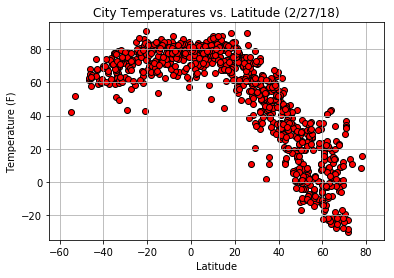

In [8]:
temp_scat = plt.scatter(city_df["Latitude"], city_df["Temperature (F)"], marker="o", color="r", edgecolors="black")

plt.xlim((city_df["Latitude"].min()) - 10, (city_df["Latitude"].max()) + 10)
plt.ylim((city_df["Temperature (F)"].min()) - 5,(city_df["Temperature (F)"].max()) + 5)
plt.grid()

plt.title("City Temperatures vs. Latitude (2/27/18)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("temp png")

plt.show()

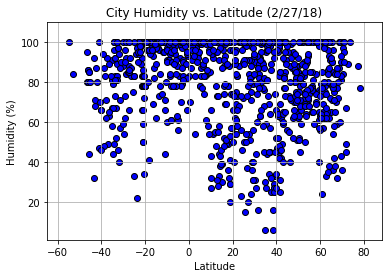

In [9]:
humid_scat = plt.scatter(city_df["Latitude"], city_df["Humidity (%)"], marker="o", color="b", edgecolors="black")

plt.xlim((city_df["Latitude"].min()) - 10, (city_df["Latitude"].max()) + 10)
plt.ylim((city_df["Humidity (%)"].min()) - 5, (city_df["Humidity (%)"].max()) + 10)
plt.grid()

plt.title("City Humidity vs. Latitude (2/27/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("humidity png")

plt.show()

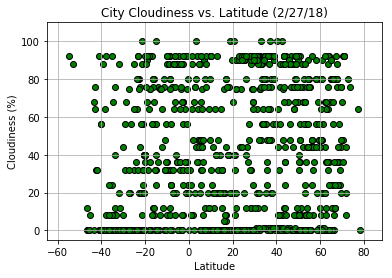

In [10]:
cloud_scat = plt.scatter(city_df["Latitude"], city_df["Cloudiness (%)"], marker="o", color="g", edgecolors="black")

plt.xlim((city_df["Latitude"].min()) - 10, (city_df["Latitude"].max()) + 10)
plt.ylim((city_df["Cloudiness (%)"].min()) - 5, (city_df["Cloudiness (%)"].max()) + 10)
plt.grid()

plt.title("City Cloudiness vs. Latitude (2/27/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("clouds png")

plt.show()

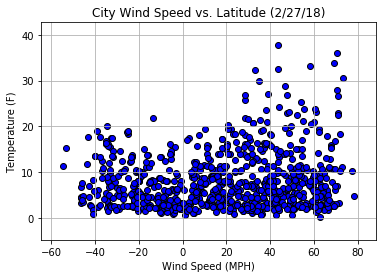

In [11]:
temp_scat = plt.scatter(city_df["Latitude"], city_df["Wind Speed (MPH)"], marker="o", color="b", edgecolors="black")

plt.xlim((city_df["Latitude"].min()) - 10, (city_df["Latitude"].max()) + 10)
plt.ylim((city_df["Wind Speed (MPH)"].min()) - 5,(city_df["Wind Speed (MPH)"].max()) + 5)
plt.grid()

plt.title("City Wind Speed vs. Latitude (2/27/18)")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Temperature (F)")

plt.savefig("wind speed png")

plt.show()

In [13]:
city_df.to_csv("City API Homework.csv")